# What Makes a Top 10 NBA Draft Pick?
**Analyzing Player Attributes from Top 10 NBA First Round Draft Picks**

Authors: William Miller, Matthew Muccio

## Project Abstract

Every June, the National Basketball Association (NBA) holds a draft, where each of the thirty teams have an oppurtunity to select two top prospects to join their organization. With only two rounds in the draft - and only two chances per team - it is crucial that a team does proper research, scouting, and analysis to ensure that their draft picks have a significant impact on their odds at winning a championship.

Using the NBA data API for all players currently in the league, we will examine top 10 draft picks and see how they compare to all players in the league. Then we will make use of various individual player attributes to determine what properties correlate to top NBA draft picks. After having read through our data analysis, we hope that you will understand the importance of research and scouting that NBA teams undergo in selecting top draft picks.

### Project Outline

1. Project Introduction
  - A. Libraries and Dependencies
  - B. Data Sources
  - C. Importing and Examining the Dataset
  - D. Getting Top 10 Draft Picks
  - E. Various Data Trends of Top 10 Draft Picks
2. Exploring Top 10 Draft Picks
  - A. Top 10 Draft Picks by Position
  - B. How Many Current NBA Players Are Top 10 Draft Picks?
  - C. How Many Current NBA Players Are Not Top 10 Draft Picks?
  - D. Top 10 Draft Picks by Size
  - E. Top 10 Draft Picks by Place of Origin
3. Analysis of Top 10 Draft Picks' Attributes
  - A. What Attributes Matter Most? 
  - B. Comparing Attributes
  - C. Visualizing Key Attributes
4. Finding Key Attributes Using Multiple Linear Regression
  - A. Null Hypothesis Testing
  - B. Using SciKit-Learn and StatsModel for Regression Model
5. Predicting the Ideal Draft Pick Based on Player Attributes with ML
  - A. Training and Testing
6. Project Conclusion
  - A. Closing Statement About Attributes
  - B. Closing Statement About Ideal Draft Pick Prediction
  - C. Final Thoughts
****

# 1. Project Introduction

## 1A. Libraries and Dependencies

- Python Standard Library Modules:
  - JSON

- Third-Party Library Modules:
  - Matplotlib - pyplot
  - Pandas
  - Requests
  - Scikit-learn 
  - Seaborn
  - StatsModels - API 

In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn
from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api

## 1B. Data Sources

The dataset used in our analysis includes all information from almost 500 current players in the NBA. The NBA releases an updated version of this data everyday. It contains information such as player names, height, weight, college, draft number, and country of origin. We will be looking at information from only the players who were drafted in the top 10 of their class. 

The dataset can be found [here](http://data.nba.net/10s/prod/v1/2018/players.json). It comes directly from the NBA website.

## 1C. Importing and Examining the Dataset

Loading the JSON into a Pandas dataframe. We organize the dataframe into only the columns of data we will use for analysis. These include: 
    - First Name
    - Last Name
    - Position
    - Height (Feet)
    - Height (Inches)
    - Weight (Pounds)
    - Date of Birth (Year)
    - Date of Birth (Month)
    - Date of Birth (Day)
    - NBA Debut Year
    - Number of Years in NBA
    - College
    - Last affiliation (College or Location)
    - Country
    - Draft Round Number
    - Draft Pick Number
    - Draft Year
    - Team

In [2]:
# Prepping player data from NBA API to be added to a Pandas DataFrame.
endpoint = "http://data.nba.net/10s/prod/v1/2018/players.json"
r = requests.get(endpoint)
raw_data = r.json()

player_data = raw_data["league"]["standard"]

players = []

for player in player_data:
    players.append(
    {
        "firstName": player["firstName"],
        "lastName": player["lastName"],
        "pos": player["pos"],
        "heightFeet": player["heightFeet"],
        "heightInches": player["heightInches"],
        "heightTotal": player["heightFeet"] + " " + player["heightInches"],
        "weightPounds": player["weightPounds"],
        "birthYear": int(player["dateOfBirthUTC"][:4:]) if not player["dateOfBirthUTC"][:4:] == "" else "",
        "birthMonth": int(player["dateOfBirthUTC"][5:7:]) if not player["dateOfBirthUTC"][5:7:] == "" else "",
        "birthDay": int(player["dateOfBirthUTC"][8:10:]) if not player["dateOfBirthUTC"][8:10:] == "" else "",
        "nbaDebutYear": player["nbaDebutYear"],
        "yearsPro": player["yearsPro"],
        "collegeName": player["collegeName"],
        "lastAffiliation": player["lastAffiliation"],
        "country": player["country"],
        "roundNum": int(player["draft"]["roundNum"]) if not player["draft"]["roundNum"] == "" else "",
        "pickNum": int(player["draft"]["pickNum"]) if not player["draft"]["pickNum"] == "" else "",
        "draftYear": player["draft"]["seasonYear"],
        "teamId": player["draft"]["teamId"]
    })

df = pd.DataFrame(players)
df.head()

,birthDay,birthMonth,birthYear,collegeName,country,draftYear,firstName,heightFeet,heightInches,heightTotal,lastAffiliation,lastName,nbaDebutYear,pickNum,pos,roundNum,teamId,weightPounds,yearsPro
0,1,8,1993,,Spain,2013,Alex,6,6,6 6,Spain/Spain,Abrines,2016,32,G,2,1610612760,200,2
1,4,5,1996,St. Bonaventure,USA,,Jaylen,6,2,6 2,St. Bonaventure/USA,Adams,2018,,G,,,190,0
2,20,7,1993,Pittsburgh,New Zealand,2013,Steven,7,0,7 0,Pittsburgh/New Zealand,Adams,2013,12,C,1,1610612760,265,5
3,18,7,1997,Kentucky,USA,2017,Bam,6,10,6 10,Kentucky/USA,Adebayo,2017,14,C-F,1,1610612748,255,1
4,5,6,1993,Illinois State,Trinidad and Tobago,,DeVaughn,6,6,6 6,Illinois State/Trinidad and Tobago,Akoon-Purcell,2018,,G-F,,,200,0


Since team identification for each player is stored as a number instead of a team name, we need to convert the id's to team names. To do this we will be looking at another page of data that the NBA provides. The data page can be found [here](http://data.nba.net/) and includes all of the information of teams that are associated with the NBA, including the team id's. We can use this data to match the team id with an actual team name in our dataframe.

In [3]:
df.describe()

,birthDay,birthMonth,birthYear,collegeName,country,draftYear,firstName,heightFeet,heightInches,heightTotal,lastAffiliation,lastName,nbaDebutYear,pickNum,pos,roundNum,teamId,weightPounds,yearsPro
count,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498
unique,32,13,23,156,47,21,383,4,13,20,245,414,21,60,7,3,31,85,21
top,5,5,1994,,USA,,Tyler,6,10,6 10,Kentucky/USA,Williams,2017,,G,1,,220,0
freq,23,54,49,56,383,106,6,449,54,53,21,7,80,106,194,277,106,32,89


In [4]:
# Prepping team data from NBA API to be added to a teams dictionary
# to replace teamId with actual team names.
endpoint = "http://data.nba.net/"
r = requests.get(endpoint)
raw_data = r.json()

team_data = raw_data["sports_content"]["teams"]["team"]

teams = {}

for team in team_data:
    if team["is_nba_team"]:
        teamId = team["team_id"]
        teamName = team["team_name"] + " " + team["team_nickname"]
        teams[teamId] = teamName

In [5]:
# Converting teamId column to actual team name.
# Converting collegeName column to None if blank.
for i, row in df.iterrows():
    teamId = row["teamId"]
    if teamId:
        df.at[i, "teamId"] = teams[int(row["teamId"])]
    # Omit this block if we want players with no teams to remain blank.
    else:
        df.at[i, "teamId"] = "None"
    
    def convert_to_none(col):
        colName = row[col]
        if not colName:
            df.at[i, col] = "None"
    def convert_to_zero(col):
        colName = row[col]
        if not colName:
            df.at[i, col] = 0
            
    convert_to_none("collegeName")
    convert_to_none("draftYear")
    convert_to_none("nbaDebutYear")
    convert_to_zero("pickNum")
    convert_to_zero("roundNum")
df

,birthDay,birthMonth,birthYear,collegeName,country,draftYear,firstName,heightFeet,heightInches,heightTotal,lastAffiliation,lastName,nbaDebutYear,pickNum,pos,roundNum,teamId,weightPounds,yearsPro
0,1,8,1993,None,Spain,2013,Alex,6,6,6 6,Spain/Spain,Abrines,2016,32,G,2,Oklahoma City Thunder,200,2
1,4,5,1996,St. Bonaventure,USA,None,Jaylen,6,2,6 2,St. Bonaventure/USA,Adams,2018,0,G,0,None,190,0
2,20,7,1993,Pittsburgh,New Zealand,2013,Steven,7,0,7 0,Pittsburgh/New Zealand,Adams,2013,12,C,1,Oklahoma City Thunder,265,5
3,18,7,1997,Kentucky,USA,2017,Bam,6,10,6 10,Kentucky/USA,Adebayo,2017,14,C-F,1,Miami Heat,255,1
4,5,6,1993,Illinois State,Trinidad and Tobago,None,DeVaughn,6,6,6 6,Illinois State/Trinidad and Tobago,Akoon-Purcell,2018,0,G-F,0,None,200,0
5,19,7,1985,Texas,USA,2006,LaMarcus,6,11,6 11,Texas/USA,Aldridge,2006,2,F,1,Chicago Bulls,260,12
6,29,10,1997,None,USA,None,Rawle,6,5,6 5,USA/USA,Alkins,None,0,G,0,None,225,0
7,8,10,1995,Duke,USA,2018,Grayson,6,5,6 5,Duke University/USA,Allen,2018,21,G,1,Utah Jazz,198,0
8,21,4,1998,Texas,USA,2017,Jarrett,6,11,6 11,Texas/USA,Allen,2017,22,C,1,Brooklyn Nets,237,1
9,21,9,1990,Wake Forest,USA,2010,Al-Farouq,6,9,6 9,Wake Forest/USA,Aminu,2010,8,F,1,Los Angeles Clippers,220,8


## 1D. Getting Top 10 Draft Picks

Since our project focuses on Top 10 draft picks, we will organize our data to isolate only players who were drafted within the top ten of their class.

In [6]:
top10_df = df.loc[(df["pickNum"] <= 10) & (df["roundNum"] == 1)]
top10_df

,birthDay,birthMonth,birthYear,collegeName,country,draftYear,firstName,heightFeet,heightInches,heightTotal,lastAffiliation,lastName,nbaDebutYear,pickNum,pos,roundNum,teamId,weightPounds,yearsPro
5,19,7,1985,Texas,USA,2006,LaMarcus,6,11,6 11,Texas/USA,Aldridge,2006,2,F,1,Chicago Bulls,260,12
9,21,9,1990,Wake Forest,USA,2010,Al-Farouq,6,9,6 9,Wake Forest/USA,Aminu,2010,8,F,1,Los Angeles Clippers,220,8
16,29,5,1984,Syracuse,USA,2003,Carmelo,6,8,6 8,Syracuse/USA,Anthony,2003,3,F,1,Denver Nuggets,240,15
20,10,11,1987,Texas,USA,2008,D.J.,6,0,6 0,Texas/USA,Augustin,2008,9,G,1,Charlotte Hornets,183,10
21,23,7,1998,Arizona,Bahamas,2018,Deandre,7,1,7 1,University of Arizona/Bahamas,Ayton,2018,1,C,1,Phoenix Suns,250,0
23,14,3,1999,Duke,USA,2018,Marvin,6,11,6 11,Duke University/USA,Bagley III,2018,2,F,1,Sacramento Kings,234,0
26,27,10,1997,California-Los Angeles,USA,2017,Lonzo,6,6,6 6,UCLA/USA,Ball,2017,2,G,1,Los Angeles Lakers,190,1
27,12,5,1998,Texas,USA,2018,Mo,7,0,7 0,University of Texas at Austin/USA,Bamba,2018,6,C,1,Orlando Magic,221,0
29,30,5,1992,North Carolina,USA,2012,Harrison,6,8,6 8,North Carolina/USA,Barnes,2012,7,F,1,Golden State Warriors,225,6
36,28,6,1993,Florida,USA,2012,Bradley,6,5,6 5,Florida/USA,Beal,2012,3,G,1,Washington Wizards,207,6


## 1E. Various Data Trends of Top 10 Draft Picks

In [7]:
# Unique positions of Top 10 Draft Picks
top10_df["pos"].unique()

array(['F', 'G', 'C', 'F-G', 'F-C', 'C-F', 'G-F'], dtype=object)

In [8]:
# Unique college names of Top 10 Draft Picks
top10_df["collegeName"].unique()

array(['Texas', 'Wake Forest', 'Syracuse', 'Arizona', 'Duke',
       'California-Los Angeles', 'North Carolina', 'Florida',
       'Kansas State', 'None', 'Lubumbashi, DR Congo', 'Villanova',
       'California', 'Michigan', 'Georgia', 'Kentucky', 'Dominquez H.S',
       'Washington', 'Gonzaga', 'Ohio State', 'Davidson',
       'Southern California', 'Connecticut', 'Providence', 'Kansas',
       'Memphis', 'Georgia Tech', "Sant'Angelo Lodigiano, Italy",
       'Barcelona, Spain', 'Fresno State', 'Indiana', 'Georgetown',
       'Oklahoma', 'Arizona State', 'Wisconsin', 'Butler', 'Croatia',
       'SW Atlanta Christian Academy (GA)', 'Florida State',
       'Michigan State', 'St. Vincent-St. Mary HS (OH)', 'Maryland',
       'Weber State', 'Peoria Central HS (IL)', 'Stanford', 'UCLA',
       'Lehigh', 'Sao Carlos, Brazil', 'Wurzburg, Germany',
       'Louisiana-Lafayette', 'Utah', 'El Masnou, Spain', 'Alabama',
       'Louisiana State', 'Oklahoma State', 'North Carolina State',
       'B

In [9]:
# Unique college names of Top 10 Draft Picks
top10_df["country"].unique()

array(['USA', 'Bahamas', 'Croatia', 'Democratic Republic of the Congo',
       'United Kingdom', 'Slovenia', 'Cameroon', 'Australia', 'Italy',
       'Spain', 'Dominican Republic', 'Turkey', 'Ukraine', 'South Sudan',
       'Finland', 'Canada', 'Brazil', 'Germany', 'France', 'Austria',
       'Latvia', 'Lithuania'], dtype=object)

In [10]:
# Top 10 NBA Draft Picks from University of Maryland
maryland_df = top10_df.loc[df["collegeName"] == "Maryland"]
maryland_df

,birthDay,birthMonth,birthYear,collegeName,country,draftYear,firstName,heightFeet,heightInches,heightTotal,lastAffiliation,lastName,nbaDebutYear,pickNum,pos,roundNum,teamId,weightPounds,yearsPro
275,16,6,1993,Maryland,Ukraine,2013,Alex,7,1,7 1,Maryland/Ukraine,Len,2013,5,C,1,Phoenix Suns,250,5


# 2. Exploring Top 10 Draft Picks

## 2A. Top 10 Draft Picks by Position

In [11]:
by_pos_df = top10_df.groupby(top10_df["pos"]).count().reset_index()
by_pos_df = by_pos_df[["pos", "pickNum"]]
by_pos_df = by_pos_df.sort_values("pickNum", ascending=False)
by_pos_df.columns = ["Position", "Count"]
by_pos_df

,Position,Count
5,G,46
2,F,37
0,C,18
3,F-C,10
1,C-F,5
4,F-G,4
6,G-F,4


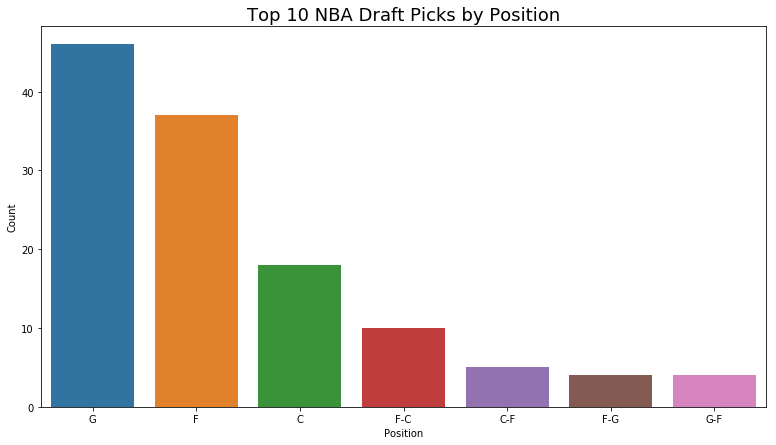

In [12]:
# Plotting top 10 draft picks by position
plt.figure(figsize=(13,7))
plt.title("Top 10 NBA Draft Picks by Position", fontsize=18)
seaborn.barplot(data=by_pos_df, x="Position", y="Count")
plt.show()

## 2B. How Many Current NBA Players Are Top 10 Draft Picks?

In [13]:
# According to the Top 10 Draft Picks Pandas DataFrame created in
# part 1D, there are 124 current NBA players that were top 10 
# NBA Draft picks.
num_top10_draft_picks = top10_df.shape[0]
print("Number of current NBA players who are top 10 draft picks:")
num_top10_draft_picks

Number of current NBA players who are top 10 draft picks:


124

## 2C. How Many Current NBA Players Are Not Top 10 Draft Picks?

In [14]:
# According to the Pandas DataFrame that was created based on the
# NBA API JSON data, there are 498 current NBA players.
num_nba_players = df.shape[0]
print("Number of current NBA players:")
num_nba_players

Number of current NBA players:


498

In [15]:
# By finding the difference of the total number of current NBA players
# and the total number of current NBA players that were not top 10
# draft picks (374).
print("Number of current NBA players who are not top 10 draft picks:")
num_not_top10_draft_picks = num_nba_players - num_top10_draft_picks
num_not_top10_draft_picks

Number of current NBA players who are not top 10 draft picks:


374

In [16]:
# There are 374 current NBA players who were not top 10 draft picks, or
# approximately 75% of all NBA players. Clearly, it is uncommon to
# be a top 10 draft pick in the NBA.
percent_not_top10_draft_picks = num_not_top10_draft_picks / num_nba_players
print("Percentage of current NBA players who are not top 10 draft picks:")
percent_not_top10_draft_picks

Percentage of current NBA players who are not top 10 draft picks:


0.751004016064257

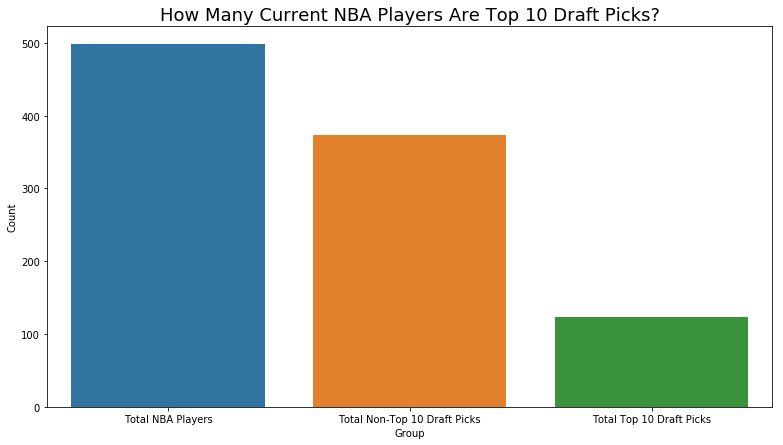

In [17]:
# Plotting bar graph of total current players in NBA, current players
# who are top 10 NBA draft picks, and current players who are not 
# top 10 NBA draft picks.

current_nba_data = [
    {
        "Group": "Total NBA Players",
        "Count": num_nba_players
    },
    {
        "Group": "Total Non-Top 10 Draft Picks",
        "Count": num_not_top10_draft_picks
    },
    {
        "Group": "Total Top 10 Draft Picks",
        "Count": num_top10_draft_picks
    }
]

current_nba_df = pd.DataFrame(current_nba_data)

plt.figure(figsize=(13,7))
plt.title("How Many Current NBA Players Are Top 10 Draft Picks?", fontsize=18)
seaborn.barplot(data=current_nba_df, x="Group", y="Count")
plt.show()

## 2D. Top 10 Draft Picks by Size

In [18]:
# Top 10 Draft Picks by Weight
by_wt_df = top10_df.groupby(top10_df["weightPounds"]).count().reset_index()
by_wt_df = by_wt_df[["weightPounds", "pickNum"]]
by_wt_df = by_wt_df.sort_values("pickNum", ascending=False)
by_wt_df.columns = ["Weight", "Count"]
by_wt_df

,Weight,Count
21,220,12
34,250,10
30,240,8
5,190,7
11,200,7
23,225,6
32,245,5
19,215,5
13,205,4
39,265,4


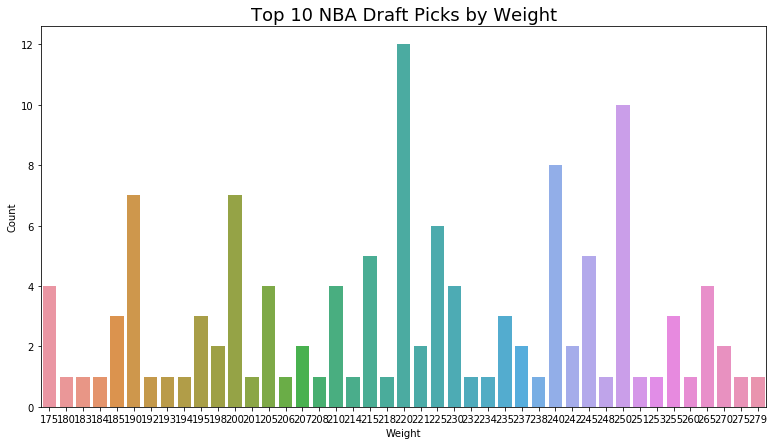

In [19]:
# It is interesting to note that, based on this bar graph, there is no
# ideal size for a top 10 NBA Draft pick. Top 10 Draft picks come in all
# shapes and sizes; they can be a 175-pound guard, or a 279-pound center.
plt.figure(figsize=(13,7))
plt.title("Top 10 NBA Draft Picks by Weight", fontsize=18)
seaborn.barplot(data=by_wt_df, x="Weight", y="Count")
plt.show()

In [20]:
# Top 10 Draft Picks by Height
by_ht_df = top10_df.groupby(top10_df["heightTotal"]).count().reset_index()
by_ht_df = by_ht_df[["heightTotal", "pickNum"]]
by_ht_df = by_ht_df.sort_values("pickNum", ascending=False)
by_ht_df.columns = ["Height", "Count"]
by_ht_df

,Height,Count
12,7 0,14
6,6 4,13
11,6 9,13
2,6 10,12
3,6 11,12
9,6 7,11
10,6 8,11
5,6 3,10
7,6 5,7
8,6 6,7


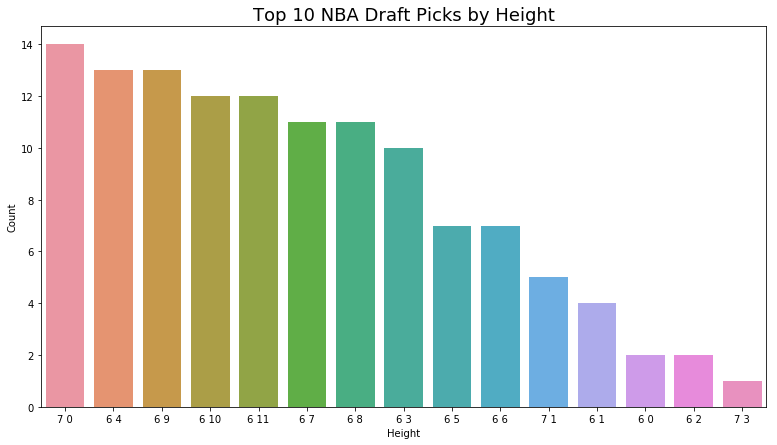

In [21]:
# Based on this bar graph, top 10 NBA Draft picks have a slight tendency
# to be taller on average. Unlike the previous graph which was by weight,
# this graph's data is less sporadic. A majority of top 10 draft picks
# are 6' 7" or taller.
plt.figure(figsize=(13,7))
plt.title("Top 10 NBA Draft Picks by Height", fontsize=18)
seaborn.barplot(data=by_ht_df, x="Height", y="Count")
plt.show()

## 2E. Top 10 Draft Picks by Place of Origin

In [22]:
# Top 10 Draft Picks by Place of Origin (College if attended, or city/country of residence)

# It is logical that the colleges which have historic basketball programs,
# which tend to have the most success each year as well as are perennial 
# championship contenders, and which recruit the top prospects out of 
# high school, are represented the most significantly in the Top 10
# NBA Draft Pick data. Schools like Kentucky, Duke, Arizona, Indiana,
# Syracuse, and UNC are not only among the winningest college basketball
# teams, they also attract the most talented high school prospects.
# This results in the school also sending a fair amount of their
# most-talented players to the NBA.
by_origin_df = top10_df.groupby(top10_df["lastAffiliation"]).count().reset_index()
by_origin_df = by_origin_df[["lastAffiliation", "pickNum"]]
by_origin_df = by_origin_df.sort_values("pickNum", ascending=False)
by_origin_df.columns = ["Place of Origin", "Count"]
by_origin_df

,Place of Origin,Count
38,Kentucky/USA,10
15,Duke/USA,6
2,Arizona/USA,4
32,Indiana/USA,4
63,Syracuse/USA,3
78,Washington/USA,3
49,North Carolina/USA,3
51,Ohio State/USA,3
9,Connecticut/USA,3
26,Georgetown/USA,3


# 3. Analysis of Top 10 Draft Picks' Attributes

## 3A. What Attributes Matter Most?

In [23]:
# After we have explored our dataset, we can move on to to some
# data analysis. In order to determine which attributes matter the
# most in selecting a top 10 NBA Draft pick, we must first view
# all the columns, or attributes, that we can use from the dataset.
attributes = top10_df.columns.tolist()
for a in attributes:
    print(a)

birthDay
birthMonth
birthYear
collegeName
country
draftYear
firstName
heightFeet
heightInches
heightTotal
lastAffiliation
lastName
nbaDebutYear
pickNum
pos
roundNum
teamId
weightPounds
yearsPro


## 3B. Comparing Attributes

In [24]:
#

## 3C. Visualizing Key Attributes

In [25]:
#

# 4. Finding Key Attributes Using Multiple Linear Regression

## 4A. Null Hypothesis Testing

In [26]:
#

## 4B. Using SciKit-Learn and StatsModels for Regression Model

In [27]:
#

# 5. Predicting the Ideal Draft Pick Based on Player Attributes with ML

## 5A. Training and Testing

In [28]:
#

# Project Conclusion

## 6A. Closing Statement About Attributes

In [29]:
#

## 6B. Closing Statement About Ideal Draft Pick Prediction

In [30]:
#

## 6C. Final Thoughts

In [31]:
#